In [1]:
import tensorflow as tf 
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

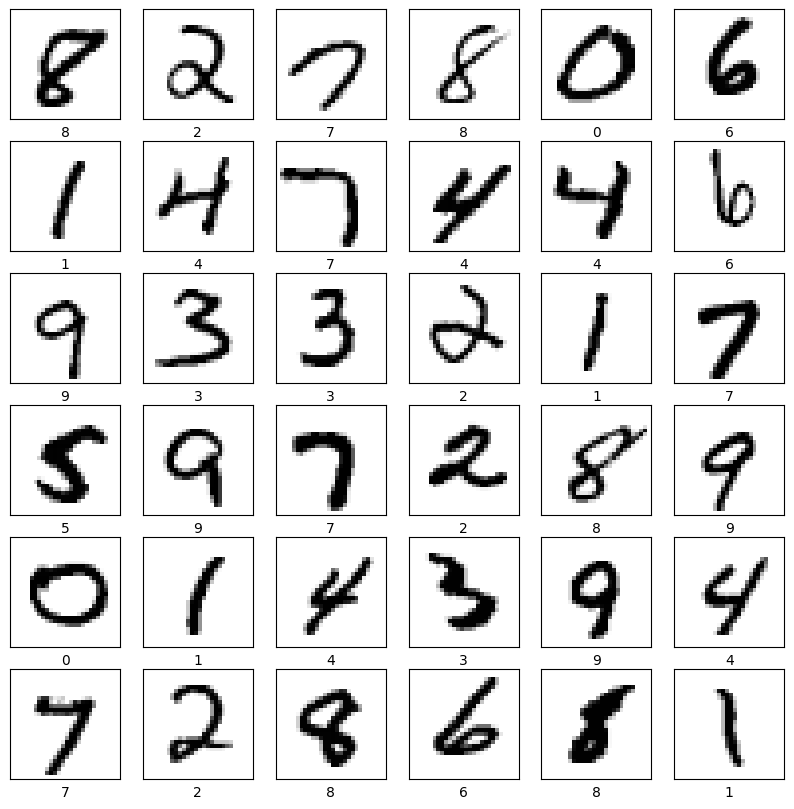

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [4]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(128, activation= tf.nn.relu),

      tf.keras.layers.Dense(10, activation= tf.nn.softmax)
      
  ])
  return fc_model

model = build_fc_model()

In [5]:

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 1s 538us/step - loss: 0.3737 - accuracy: 0.8969
Epoch 2/5
938/938 [==============================] - 0s 530us/step - loss: 0.2030 - accuracy: 0.9429
Epoch 3/5
938/938 [==============================] - 1s 552us/step - loss: 0.1525 - accuracy: 0.9562
Epoch 4/5
938/938 [==============================] - 1s 540us/step - loss: 0.1228 - accuracy: 0.9649
Epoch 5/5
938/938 [==============================] - 1s 602us/step - loss: 0.1035 - accuracy: 0.9711


In [7]:

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 347us/step - loss: 0.1045 - accuracy: 0.9699
Test accuracy: 0.9699000120162964


In [8]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 0s 86ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 36)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 d

In [9]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1766 - accuracy: 0.9464
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0517 - accuracy: 0.9840
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0376 - accuracy: 0.9881
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0271 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0231 - accuracy: 0.9929


In [11]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9891
Test accuracy: 0.9890999794006348


In [12]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [13]:
predictions[0]

array([4.9212954e-08, 5.2087290e-09, 5.9900503e-07, 1.4031699e-06,
       1.0972248e-08, 2.4603639e-07, 3.7422154e-13, 9.9999559e-01,
       5.4332992e-07, 1.4783852e-06], dtype=float32)

In [14]:
prediction = np.argmax(predictions[0]) 

print(prediction)

7


Label of this digit is: 7


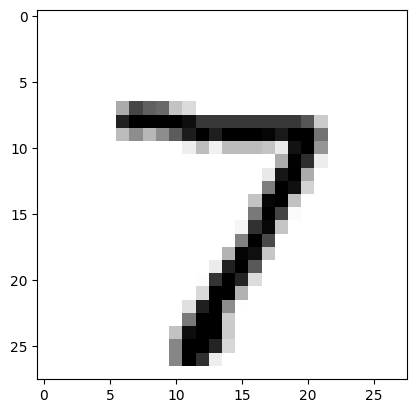

In [15]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

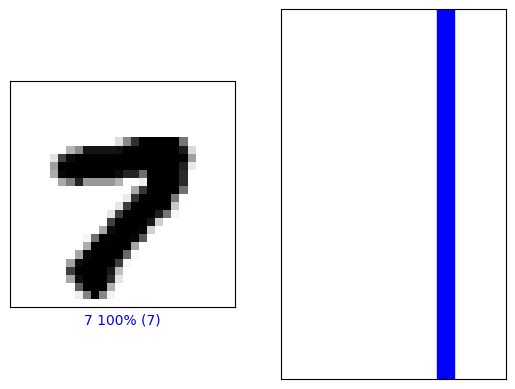

In [16]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

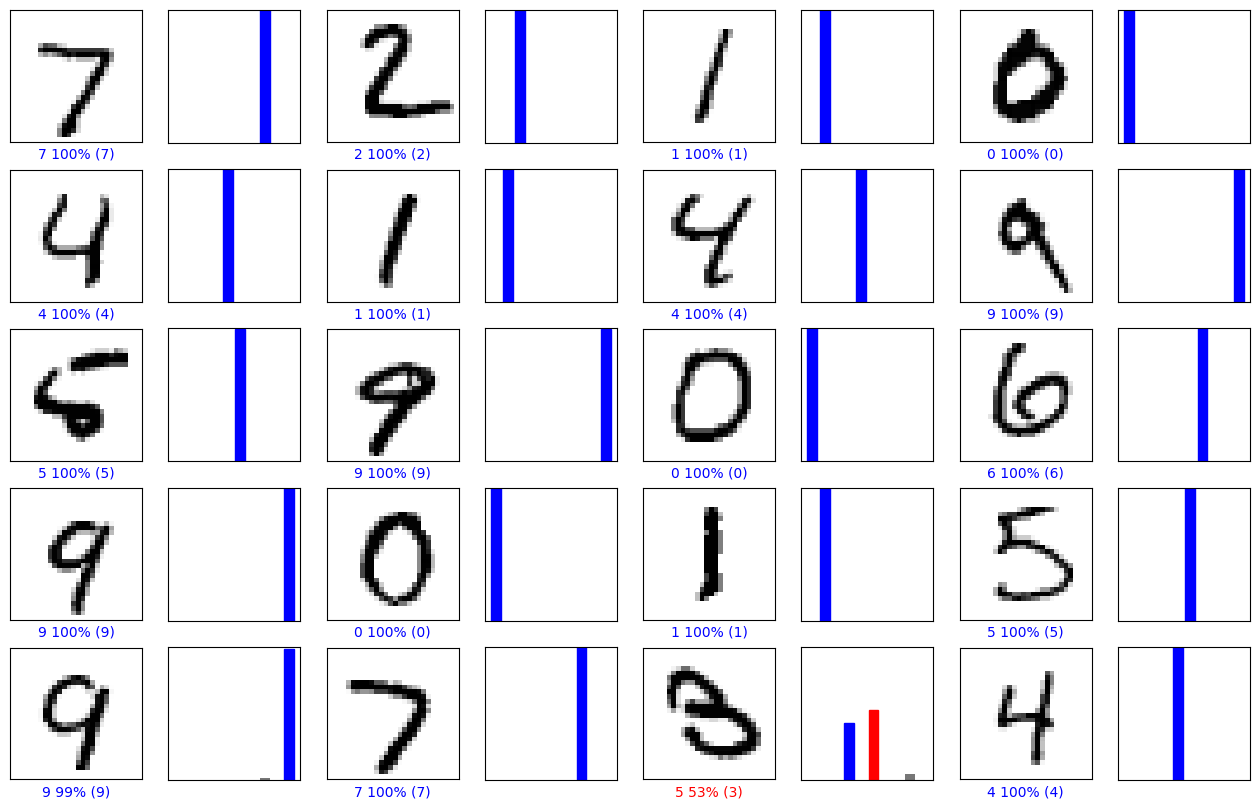

In [17]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)


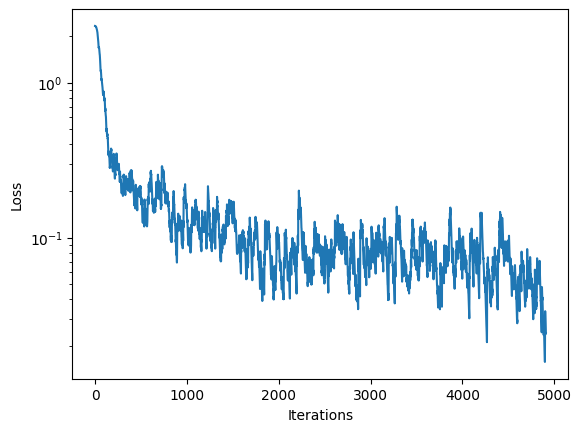

100%|██████████| 5000/5000 [00:36<00:00, 138.25it/s]


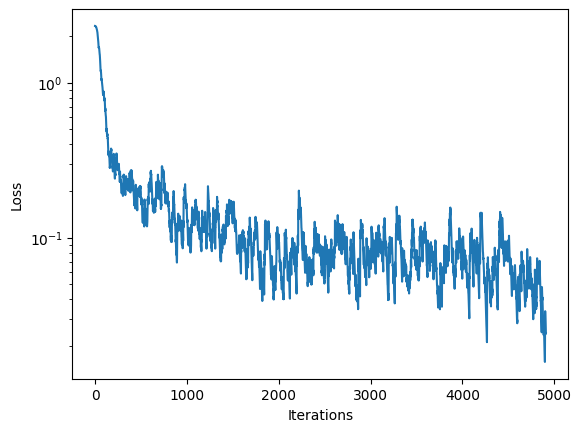

In [18]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    logits = cnn_model(images)

    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  # grads = # TODO
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
